In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [11]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df.shape

(712, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Gender    712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#### Survived

In [25]:
df["Survived"].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

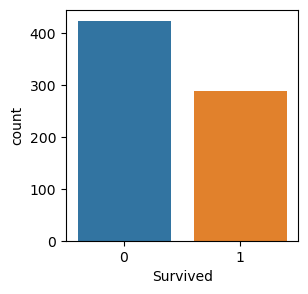

In [26]:
plt.figure(figsize=(3,3))
sns.countplot(x="Survived",data=df)

#### Pclass

In [27]:
df["Pclass"].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

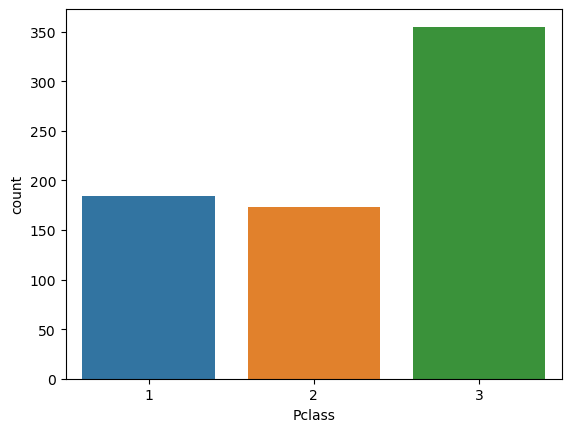

In [28]:
sns.countplot(x="Pclass",data=df)

#### Gender 

<Axes: xlabel='Gender', ylabel='count'>

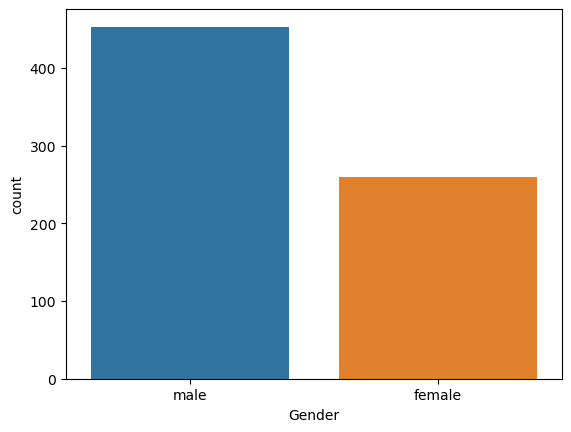

In [29]:
sns.countplot(x="Gender",data=df)

#### Embarked

<Axes: xlabel='Embarked', ylabel='count'>

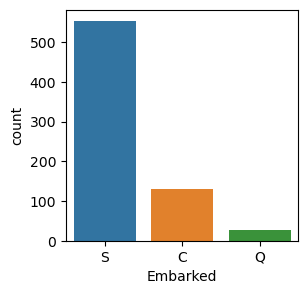

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x="Embarked",data=df)

#### Sibsp

<Axes: xlabel='SibSp', ylabel='count'>

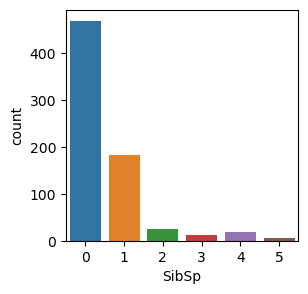

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x="SibSp",data=df)

#### Parch

<Axes: xlabel='Parch', ylabel='count'>

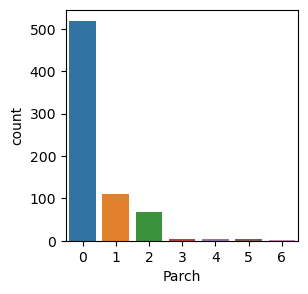

In [32]:
plt.figure(figsize=(3,3))
sns.countplot(x="Parch",data=df)

#### Age

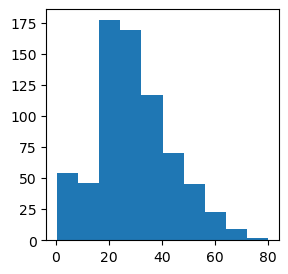

In [34]:
plt.figure(figsize=(3,3))
plt.hist(df["Age"])
plt.show()

#### Fare

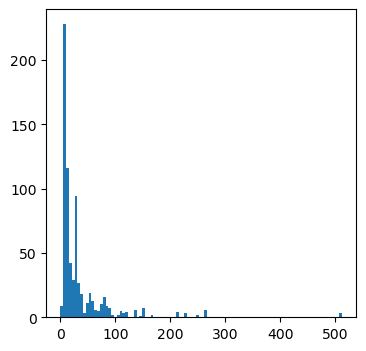

In [38]:
plt.figure(figsize=(4,4))
plt.hist(df["Fare"],bins=100)
plt.show()

#### Advanced Insights

#### 1.Survived vs Gender

In [39]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
grouped=df.groupby(["Gender","Survived"]).size().unstack()

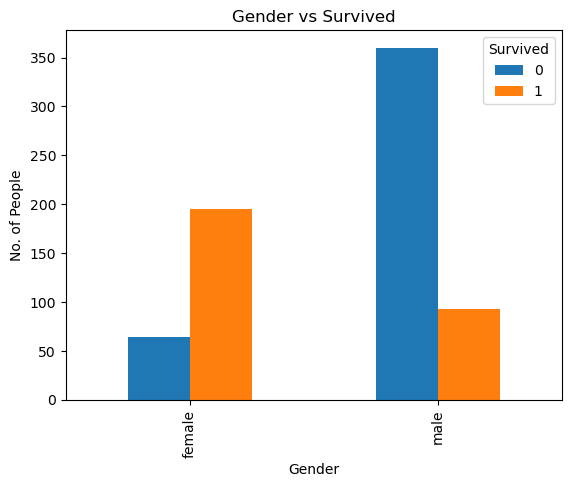

In [45]:
grouped.plot(kind='bar')
plt.title("Gender vs Survived")
plt.ylabel("No. of People")
plt.show()

##### Pclass vs Survived

In [46]:
grouped_pclass=df.groupby(["Pclass","Survived"]).size().unstack()

In [47]:
grouped_pclass

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


<Axes: xlabel='Pclass'>

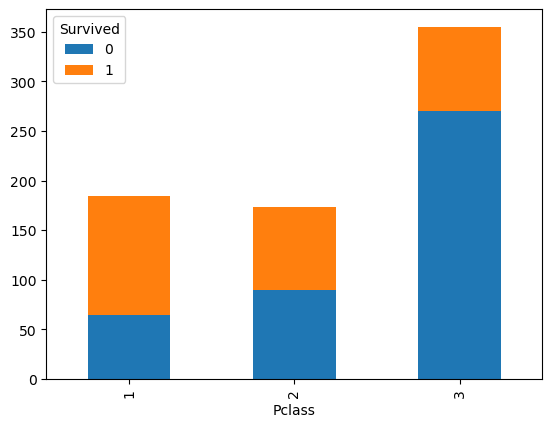

In [49]:
grouped_pclass.plot(kind='bar',stacked=True)

#### Survived vs Age

/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


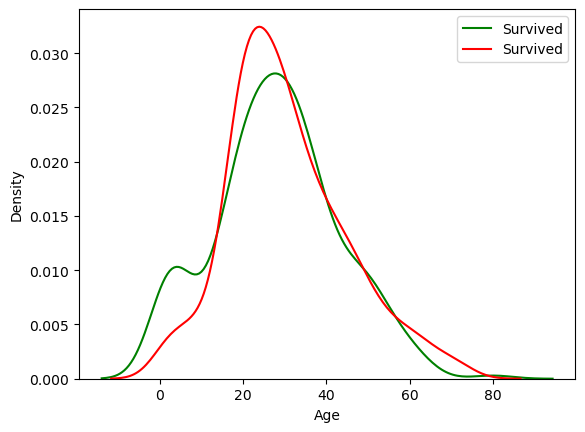

In [51]:
sns.kdeplot(df[df["Survived"]==1]["Age"],color="green",label="Survived")
sns.kdeplot(df[df["Survived"]==0]["Age"],color="red",label="Survived")
plt.legend()
plt.show()

In [52]:
##### Embarked vs Survived

<Axes: xlabel='Embarked'>

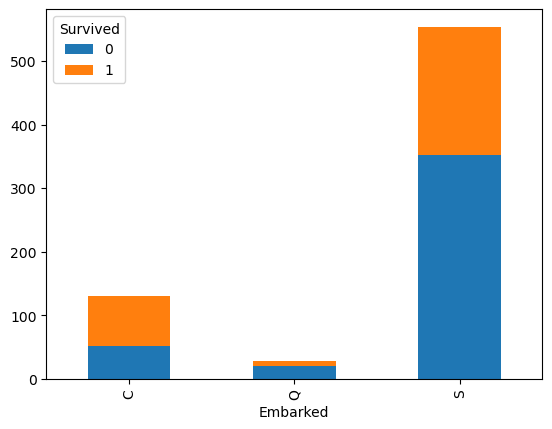

In [53]:
grouped_embarked=df.groupby(["Embarked","Survived"]).size().unstack()
grouped_embarked.plot(kind='bar',stacked=True)

#### Survival vs Fare

/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


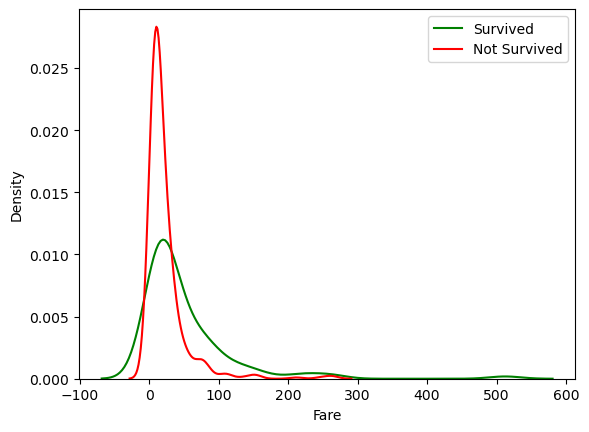

In [54]:
sns.kdeplot(df[df["Survived"]==1]["Fare"],color="green",label="Survived")
sns.kdeplot(df[df["Survived"]==0]["Fare"],color="red",label="Not Survived")
plt.legend()
plt.show()

#### Correlation

In [57]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [59]:
numeric_df=df.select_dtypes(include=["float","int"])
numeric_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [60]:
cor=numeric_df.corr()

In [61]:
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

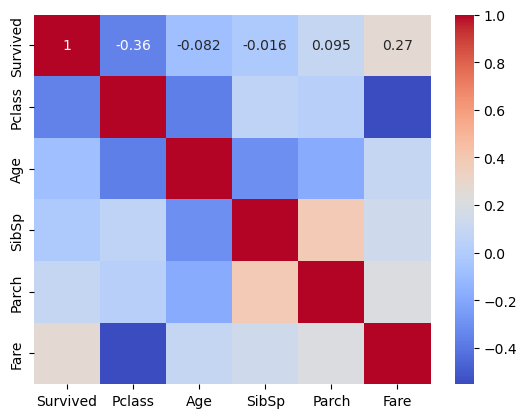

In [63]:
sns.heatmap(cor,cmap='coolwarm',annot=True)

/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

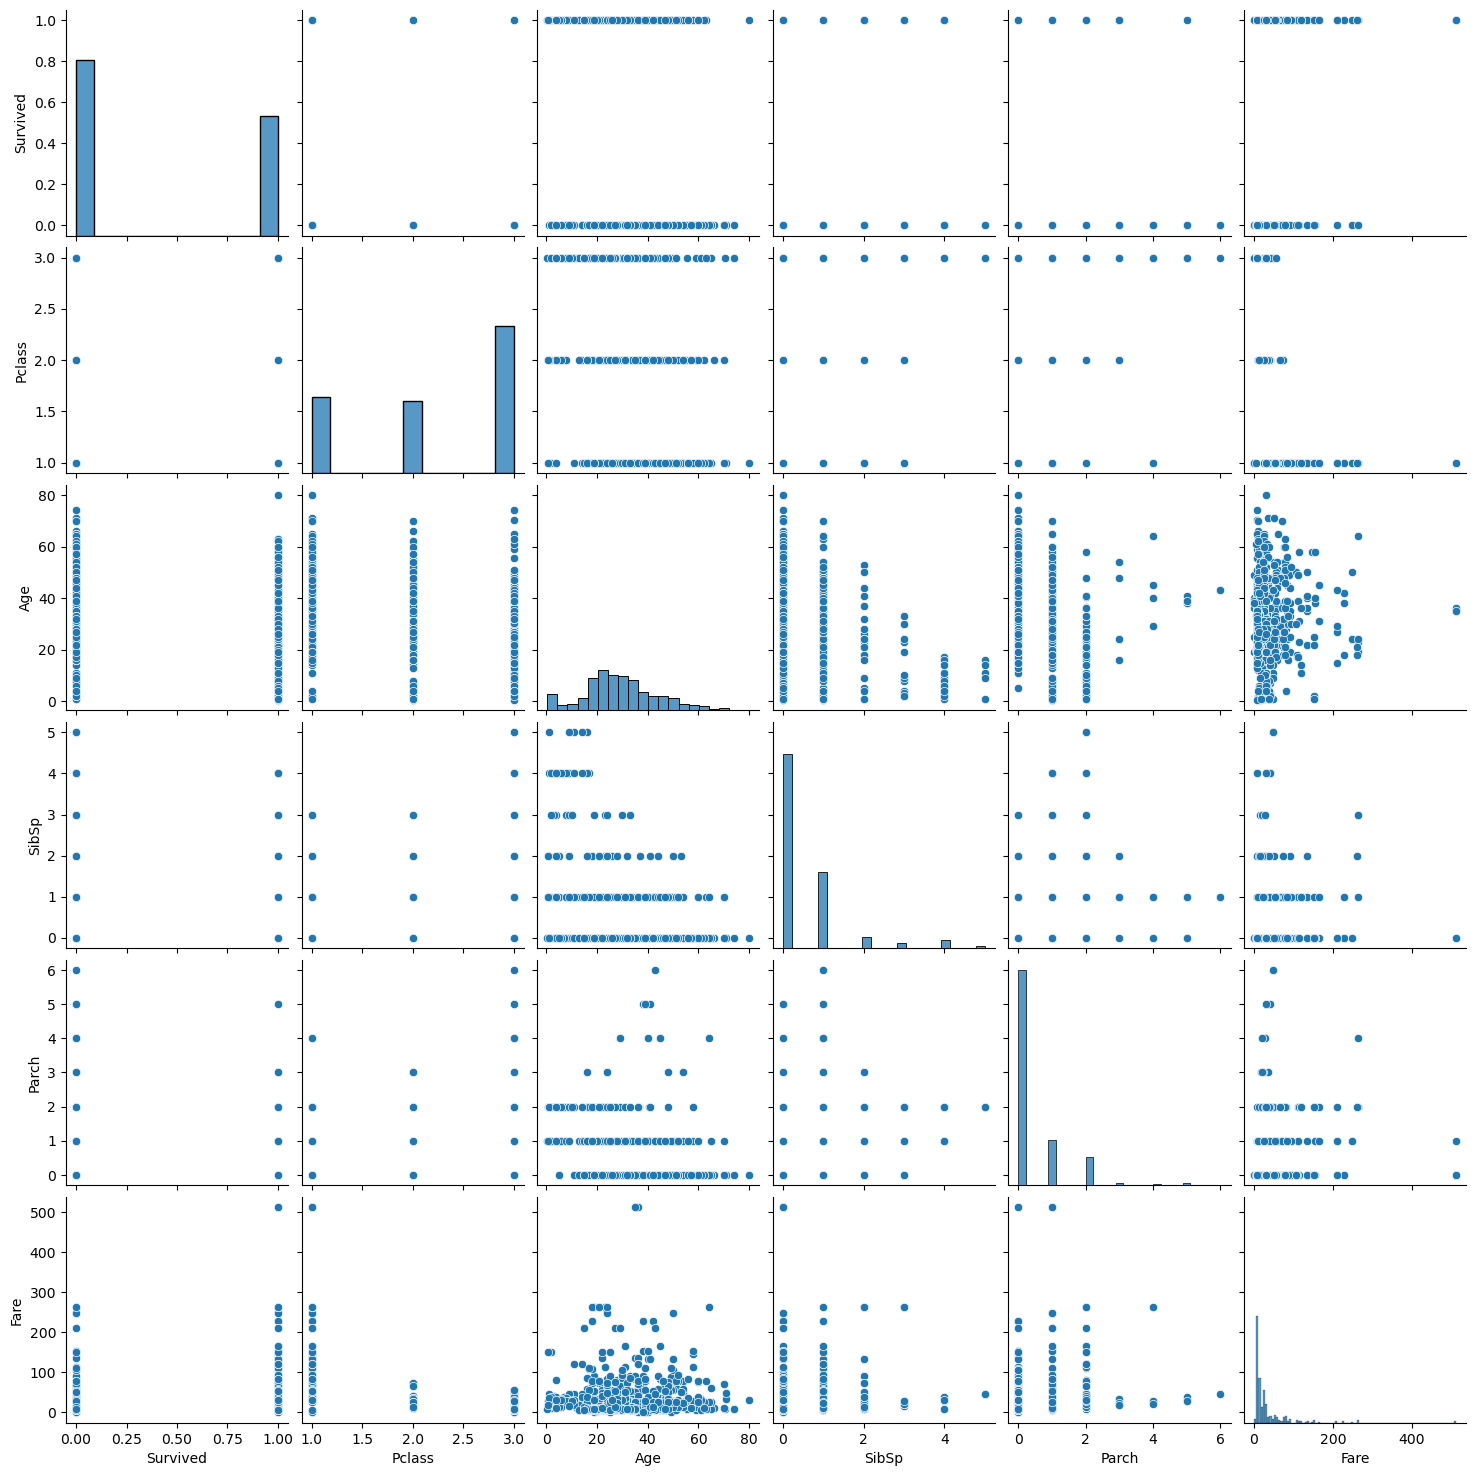

In [65]:
sns.pairplot(df)

#### Age vs Gender

In [66]:
male_data=df[df["Gender"]=="male"]
female_data=df[df["Gender"]=="female"]

/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniket/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


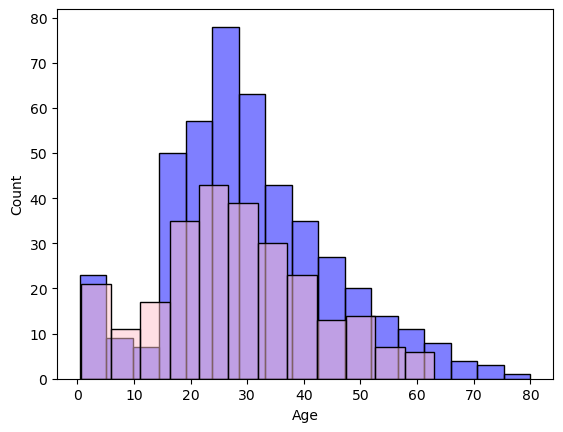

In [67]:
sns.histplot(data=male_data,x="Age",color='blue',label="Male",alpha=0.5)
sns.histplot(data=female_data,x="Age",color='pink',label="feale",alpha=0.5)
plt.show()